In [2]:
import numpy as np
# from scipy import signal
from hpcom.signal import rrcosfilter

# Generate RRC filter coefficients
alpha = 0.35 # Roll-off factor
span = 10 # Filter span in symbols
sps = 4 # Samples per symbol
# b = rrcosfilter(span, alpha, sps)

# Generate data points
data = np.random.randint(0, 2, 1000) # Random binary data

# Convolve data with RRC filter
wdm_signal = np.convolve(data, b)



2023-01-12 11:52:34.341228: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


TypeError: rrcosfilter() missing 1 required positional argument: 'sample_rate'

/home/esf0/anaconda3/envs/nn_env/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/esf0/anaconda3/envs/nn_env/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/esf0/anaconda3/envs/nn_env/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/esf0/anaconda3/envs/nn_env/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


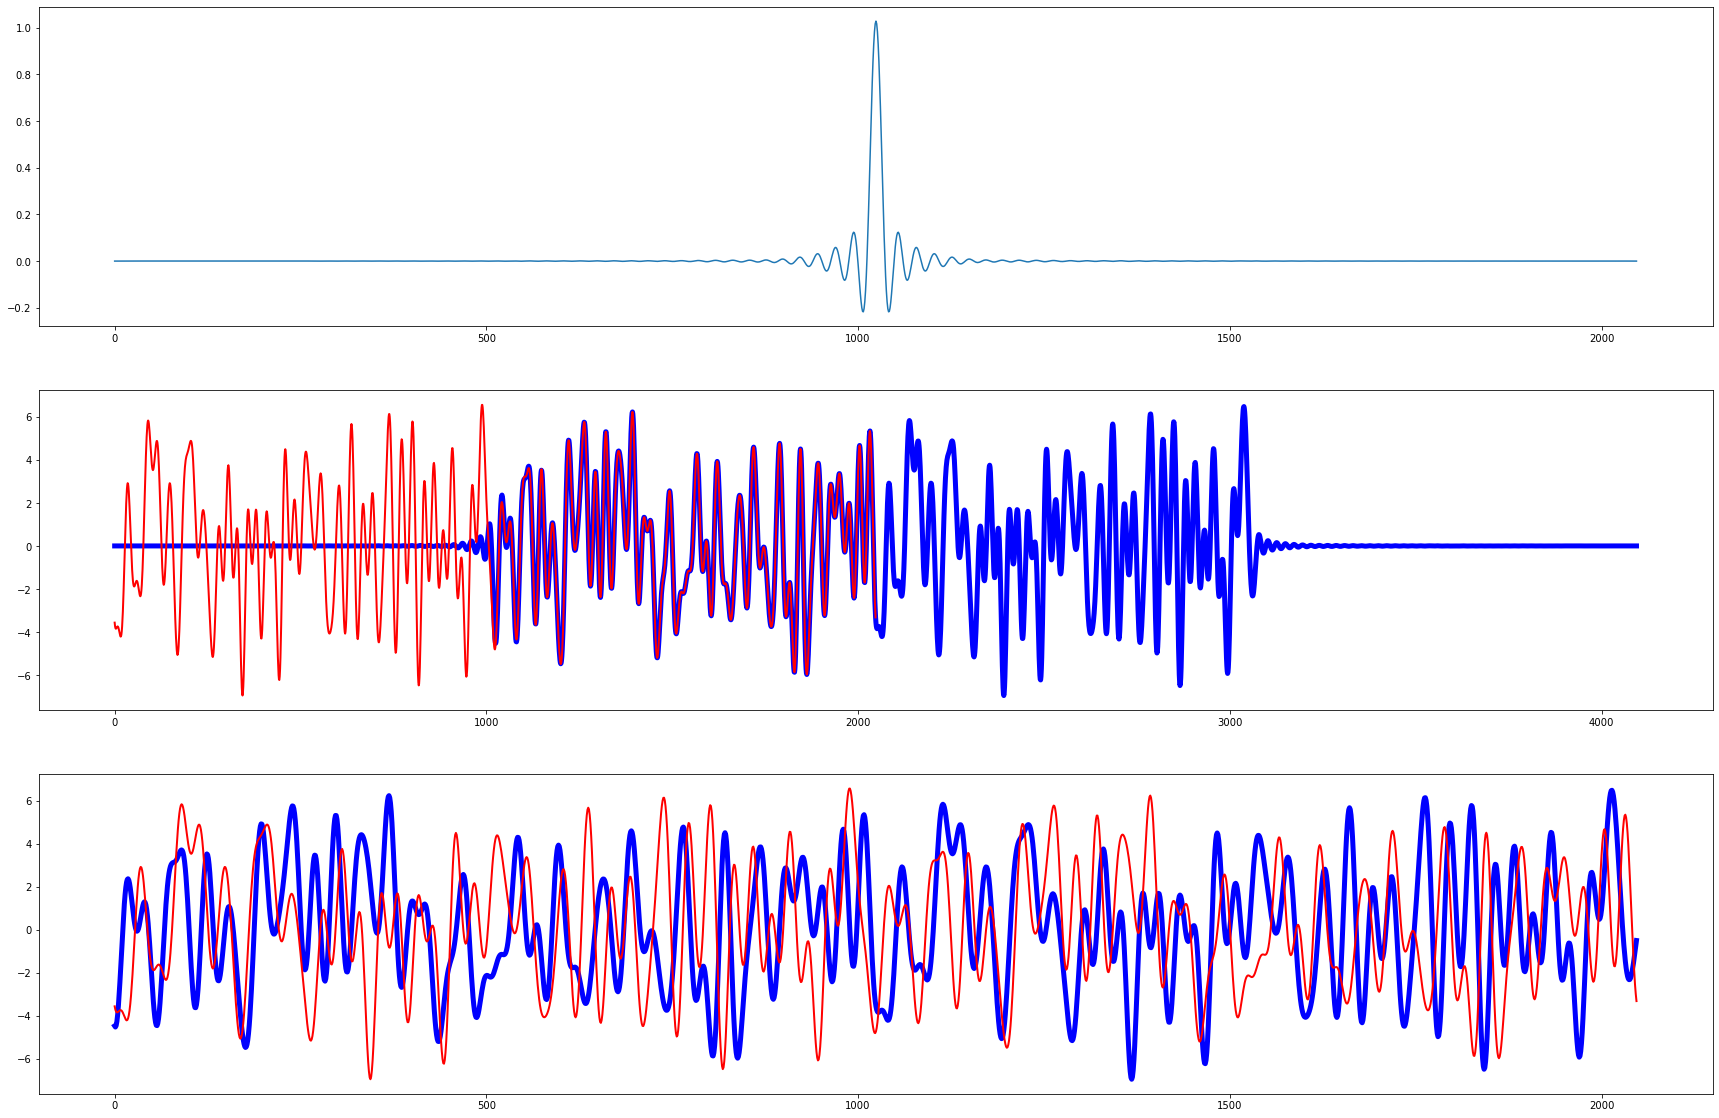

In [91]:
import numpy as np
from math import pi
from scipy.fft import fftshift, ifftshift, fft, ifft


# Generate RRC filter coefficients
alpha = 0.1 # Roll-off factor
span = 2 ** 11 # Filter span in symbols
sps = 8 # Samples per symbol
n_data = 2 ** 8
t_s = 10

# Generate the RRC filter coefficients
n = np.arange(-(span-1)/2, (span-1)/2+1)
rrc = np.sinc(n/sps) * np.kaiser(span, beta = 0.5/alpha)
rrc = rrcosfilter(n_data * sps, alpha, t_s, t_s / sps)
ft_rrc = fftshift(fft(rrc))
# ft_rrc = fft(rrc)



# Generate data points
data = np.random.randint(1, 4, n_data) * np.random.choice([-1, 1], size = n_data) # Random binary data
points_sequence = np.zeros(sps * n_data, dtype='complex')
points_sequence[::sps] = data

ft_points = fftshift(fft(points_sequence))
# ft_points = fft(points_sequence)
wdm_with_fft = ifft(ifftshift(ft_rrc * ft_points))
# wdm_with_fft = ifftshift(ifft(ft_rrc * ft_points))
# wdm_with_fft = ifft(ft_rrc * ft_points)

# Convolve data with RRC filter
wdm_signal = np.convolve(points_sequence, rrc)


import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(30, 20))
# Plot the RRC filter
axs[0].plot(rrc)

# # Plot the resulting signal
axs[1].plot(wdm_signal,
            color='blue',
            linewidth=5)
axs[1].plot(wdm_with_fft,
            color='red',
            linewidth=2)

axs[2].plot(wdm_signal[int(span/2):int(span/2) + span],
            color='blue',
            linewidth=5)
axs[2].plot(wdm_with_fft,
            color='red',
            linewidth=2)

# plt.plot(wdm_signal)
# plt.title('WDM Signal')
# plt.xlabel('Sample')
# plt.ylabel('Amplitude')
# plt.show()

In [4]:
print(len(wdm_signal))
print(data[:10])
a = np.array([1, 2, 3, 4, 5])
print(a, a * a, fftshift(a), ifftshift(fftshift(a)))

SyntaxError: invalid syntax (690603941.py, line 1)

256 [-58.684981   -18.67015071  25.52705792  12.24665703   2.55501811
  15.22328316 -15.68852406 -54.09922003 -22.1863464   28.11101278
  40.26887932  46.11183353  28.79534658 -28.7126711  -33.71621548]
[-3. -2.  3. -1.  1.  1. -2. -1. -3.  3.  1.  3.  1. -1. -2.]


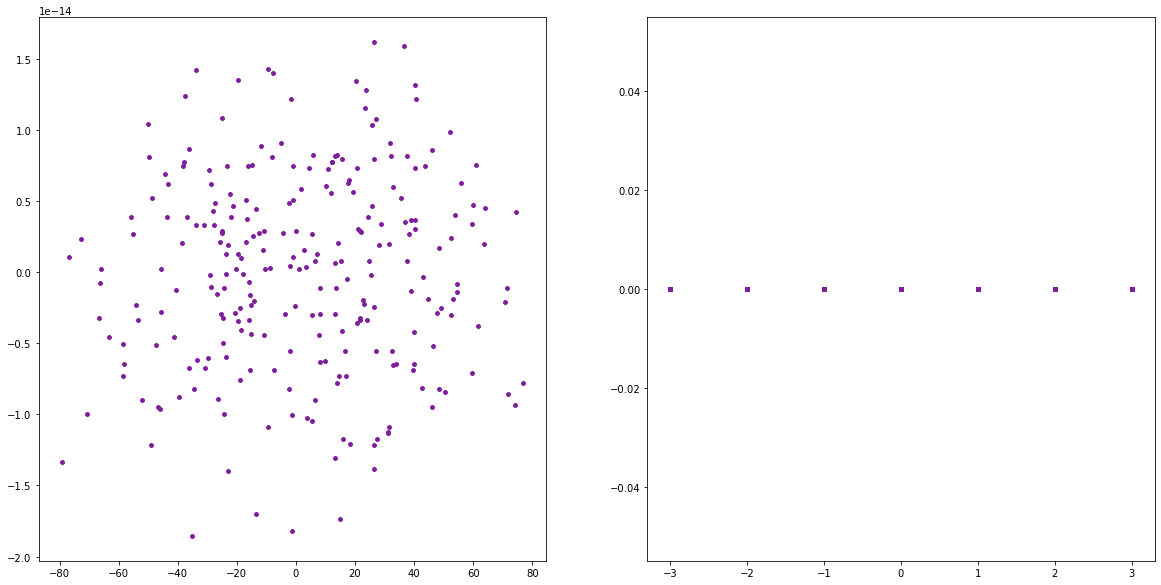

In [92]:
# points_restored = np.convolve(wdm_signal, rrc)
# points_restored = ifftshift(ifft(ft_rrc * fft(wdm_with_fft)))
points_restored = ifft(ifftshift(ft_rrc * fftshift(fft(wdm_with_fft))))
points_restored = points_restored[::sps]
print(len(points_restored), points_restored[:15].real)
print(points_sequence[::sps][:15].real)

fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].scatter(points_restored.real, points_restored.imag, s=15, c='xkcd:purple', marker='o')
axs[1].scatter(points_sequence.real, points_sequence.imag, s=15, c='xkcd:purple', marker='o')
